## **ROOT library installation**

In [ ]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!tar -xf /content/drive/Shared\ drives/PyROOT_in_Google/root_build_google_yikes.tar

In [ ]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

## **Necessary libraries are imported**

In [ ]:
import ROOT
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## **Definition of functions**

In [ ]:
def Chi2(observed, expected):
    """Chi Squared:
    observed and expected are numpy's 1-dimentional arrays"""
    return sum((observed - expected)**2/observed)

def Min(A):
    """Returns the minimun of a 2-dimentional array
    A: is a 2-dimentional array"""
    mins = []
    for row in A:
        mins.append(min(row))
    return min(mins)

def indices(x,A):
    """Return the indices corresponding to the value x in the 2-dimentional
    array A if it's in A.
    x: is a value
    A: is a 2-dimentional array"""
    shape = (len(A),len(A[0]))
    for i in range(shape[0]):
        for j in range(shape[1]):
            if A[i,j] == x:
                return [i,j]

def E_MC(f,a,b,n,args):
    """Montecarlo Integral Estimated:
    f: is the function to be integrated
    a: is the lower limit
    b: is the upper limit
    n: is the size of the sample of integration
    args: is a list with the arguments required for f
    """
    N = int(n)
    X = a + (b-a)*np.random.random(N)#Random number in (a ; b)
    return (b-a)*sum(f(X,*args))/N

def g(t,x,mu,c):
    """Auxiliary function required for the Landau's pdf"""
    return np.exp(-t)*np.cos(t*(x-mu)/c + 2*t*np.log(t/c)/np.pi)/(np.pi*c)

def Landau(x,mu=0,c=1,b=1e3,n=1e7):
    """Landau's PDF own implementation:
    x: is the list of the abscissa
    mu: a parameter in the Landau's pdf
    c: a parameter in the Landau's pdf
    b: is the upper limit in the integral definition of Landau's pdf
    n: is the size of the sample of integration
    """
    try: # When x is an array
        Integral = []
        for i in range(len(x)):
            Integral.append(E_MC(g,0.,b,n,args=[x[i],mu,c]))
        return np.array(Integral)
    except TypeError: # When x is a number
        return E_MC(g,0,b,n,args=[x,mu,c])

def Landau_root(x,mu,c):
    """Landau's PDF root implementation:
    x: is the list of the abscissa
    mu: a parameter in the Landau's pdf
    c: a parameter in the Landau's pdf
    """
    try: # When x is an array
        y = []
        for x_i in x:
            y.append(ROOT.TMath.Landau(x_i,mu,c,True))
        return np.array(y)
    except TypeError: # When x is a number
        return ROOT.TMath.Landau(x,mu,c,True)

def Metropolis(N,a,b,phi_0,pdf,args):
    """Metropolis' algoritm:
    N: number of data to be generated
    (a ; b): interval of generation
    phi_0: initial value
    pdf: probability density function
    args: pdf arguments
    """
    phi = [phi_0]
    for i in range(N):
        added = False
        while not added:
            phi_p = np.random.uniform(low=a,high=b)#random value in (a ; b)
            ds = -np.log(abs(pdf(phi_p,*args)/pdf(phi_0,*args)))
            if ds < 0:
                phi.append(phi_p)
                added = True
            if ds > 0:
                r = np.random.random()
                if pdf(phi_p,*args)/pdf(phi_0,*args) > r:
                    phi.append(phi_p)
                    added = True
    return np.array(phi)

## **Import data from JuanDavidPosada.root**

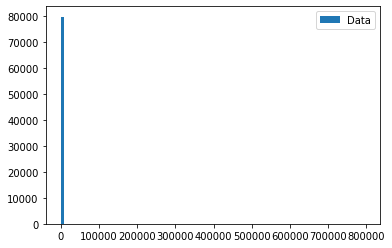

[7.9882e+04 4.7000e+01 1.7000e+01 1.4000e+01 9.0000e+00 5.0000e+00
 6.0000e+00 0.0000e+00 3.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00
 0.0000e+00 2.0000e+00 2.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00 1.0000e+00 1.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000

In [ ]:
DataChain = ROOT.TChain("SystemTree")
DataChain.Add("/content/drive/Shared drives/PyROOT_in_Google/DatosProyectoMontecarlo/JuanDavidPosada.root")

data_0 = []
for entry in DataChain:
  data_0.append(entry.x)
data_0 = np.array(data_0)

histo = plt.hist(data_0,100,label='Data')
plt.legend(loc='best')
plt.show()

print(histo[0],histo[1])
print(min(data_0),max(data_0),len(data_0))

## **Data selection**

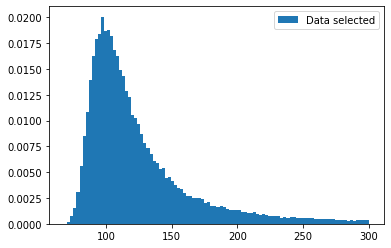

The analysis will be made with 75533 data: the 94.41625% of the data.


In [ ]:
array = []
for x_i in data_0:
    if x_i < 300: array.append(x_i)
data = np.array(array)

bins = 100
plt.hist(data,bins,density=True,label='Data selected')
plt.legend(loc='best')
plt.show()

percentage = 100*len(data)/len(data_0)
print('The analysis will be made with {} data: the {}% of the data.'.format(len(data),percentage))

## **Some trials using Landau's pdf own implementation**

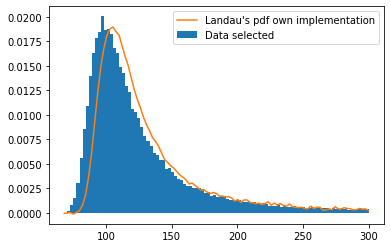

The own implementation of Landau's pdf took 4.9320831934611min to generate 101 data


In [ ]:
histo = plt.hist(data,bins,density=True,label='Data selected')
x = histo[1]

ti = time.time()
y = Landau(x,85,15)
tf = time.time()
dt = (tf - ti)/60 #dt in minutes

plt.plot(x,y,label="Landau's pdf own implementation")
plt.legend(loc='best')
plt.show()

print("The own implementation of Landau's pdf took {}min to generate {} data".format(dt,len(x)))

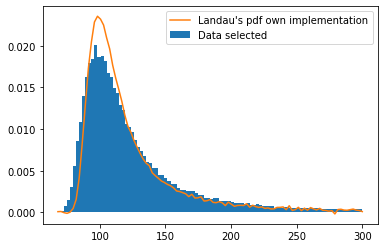

The own implementation of Landau's pdf took 5.18209822177887min to generate 101 data


In [ ]:
histo = plt.hist(data,bins,density=True,label='Data selected')
x = histo[1]

ti = time.time()
y = Landau(x,85,12)
tf = time.time()
dt = (tf - ti)/60 #dt in minutes

plt.plot(x,y,label="Landau's pdf own implementation")
plt.legend(loc='best')
plt.show()

print("The own implementation of Landau's pdf took {}min to generate {} data".format(dt,len(x)))

## **Some trials using Landau's pdf ROOT implementation**

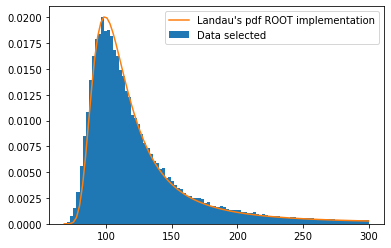

The ROOT implementation of Landau's pdf took 0.0003783265749613444min to generate 101 data


In [ ]:
histo = plt.hist(data,bins,density=True,label='Data selected')
x = histo[1]

ti = time.time()
y = Landau_root(x,101,9)
tf = time.time()
dt = (tf - ti)/60 #dt in minutes

plt.plot(x,y,label="Landau's pdf ROOT implementation")
plt.legend(loc='best')
plt.show()

print("The ROOT implementation of Landau's pdf took {}min to generate {} data".format(dt,len(x)))

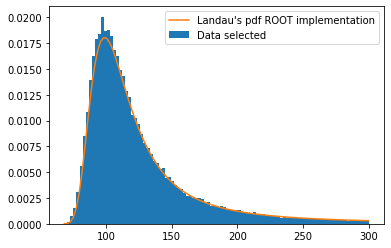

The ROOT implementation of Landau's pdf took 5.352497100830078e-06min to generate 101 data


In [ ]:
histo = plt.hist(data,bins,density=True,label='Data selected')
x = histo[1]

ti = time.time()
y = Landau_root(x,101,10)
tf = time.time()
dt = (tf - ti)/60 #dt in minutes

plt.plot(x,y,label="Landau's pdf ROOT implementation")
plt.legend(loc='best')
plt.show()

print("The ROOT implementation of Landau's pdf took {}min to generate {} data".format(dt,len(x)))

## **Fitting histograms with Landau's pdf own implementation**

In [ ]:
N = len(data)
a = min(data)
b = max(data)

Mu = np.linspace(102,104,10)
C = np.linspace(9,11,10)

observed = np.histogram(data,bins,density=True)[0]

chi_2 = np.zeros((len(Mu),len(C)))

ti = time.time()
for i in range(len(Mu)):
    for j in range(len(C)):
        print('Parameters:',i,j)
        data_exp = Metropolis(N,a,b,Mu[i],Landau,[Mu[i],C[j]])
        expected = np.histogram(data_exp,bins,density=True)[0]
        chi_2[i,j] = Chi2(observed,expected)
tf = time.time()
dt = (tf - ti)/60

i, j = indices(Min(chi_2),chi_2)

print('The algorithm took {}min'.format(dt))

Parameters: 0 0


In [ ]:
popts = [Mu[i],C[j]]
print(popts)
data_opt = Metropolis(N,a,b,Mu[i],Landau_root,[Mu[i],C[j]])

In [ ]:
x = np.linspace(a,b,1000)
plt.plot(x,Landau_root(x,Mu[i],C[j]),label='Fit')
plt.hist(data,bins,alpha=0.7,density=True,label='Data selected')
plt.hist(data_opt,bins,alpha=0.5,density=True,label='Simulation with lowest $\chi^2$')
plt.legend(loc='best')
plt.show()

## **Fitting histograms with Landau's pdf root implementation**

In [22]:
N = len(data)
a = min(data)
b = max(data)

Mu = np.linspace(100,102,10)
C = np.linspace(9,11,10)

observed = np.histogram(data,bins,density=True)[0]
dt = 0
popts_array = []
for cycle in range(50):
    print('Time:',cycle,'/ 50')
    chi_2 = np.zeros((len(Mu),len(C)))
    ti = time.time()
    for i in range(len(Mu)):
        for j in range(len(C)):
            #print('Parameters:',i,j)
            data_exp = Metropolis(N,a,b,Mu[i],Landau_root,[Mu[i],C[j]])
            expected = np.histogram(data_exp,bins,density=True)[0]
            chi_2[i,j] = Chi2(observed,expected)
    tf = time.time()
    dt_i = (tf - ti)/60
    dt += dt_i
    i, j = indices(Min(chi_2),chi_2)
    popts = [Mu[i],C[j]]
    popts_array.append(popts)
    print('The cycle took {}min'.format(dt_i))
    print('Mu = {} ; C = {}'.format(popts[0],popts[1]))
    print()

print('The algorithm took {}min = {}hours'.format(dt,dt/60))

Time: 0 / 50
The cycle took 6.920883611838023min
Mu = 100.0 ; C = 9.88888888888889

Time: 1 / 50
The cycle took 7.049105374018351min
Mu = 100.88888888888889 ; C = 9.666666666666666

Time: 2 / 50
The cycle took 7.019496834278106min
Mu = 100.88888888888889 ; C = 9.88888888888889

Time: 3 / 50
The cycle took 6.953482051690419min
Mu = 100.0 ; C = 9.88888888888889

Time: 4 / 50
The cycle took 6.961384423573812min
Mu = 100.22222222222223 ; C = 9.88888888888889

Time: 5 / 50
The cycle took 6.9357315381368005min
Mu = 100.0 ; C = 9.666666666666666

Time: 6 / 50
The cycle took 6.915510002772013min
Mu = 100.0 ; C = 9.88888888888889

Time: 7 / 50
The cycle took 6.893958775202433min
Mu = 100.22222222222223 ; C = 9.88888888888889

Time: 8 / 50
The cycle took 6.873667069276174min
Mu = 101.11111111111111 ; C = 9.88888888888889

Time: 9 / 50
The cycle took 6.915146831671397min
Mu = 100.0 ; C = 9.88888888888889

Time: 10 / 50
The cycle took 6.861528742313385min
Mu = 100.22222222222223 ; C = 9.8888888888

In [25]:
popts_array = np.array(popts_array)
mu, c = np.mean(popts_array[:,0]), np.mean(popts_array[:,1])
sd_mu, sd_c = np.std(popts_array[:,0]), np.std(popts_array[:,1])
print('Mu =',mu,'+-',sd_mu)
print('C =',c,'+-',sd_c)
data_opt = Metropolis(N,a,b,mu,Landau_root,[mu,c])

Mu = 100.66666666666669 +- 0.6190394789859588
C = 9.813333333333334 +- 0.10526861584290724


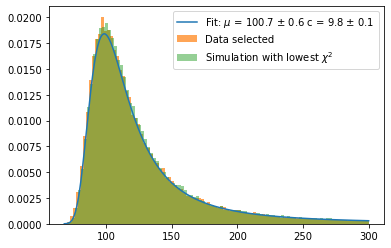

In [31]:
x = np.linspace(a,b,1000)
Label = 'Fit: $\mu$ = {:.1f} $\pm$ {:.1f} c = {:.1f} $\pm$ {:.1f}'.format(mu,sd_mu,c,sd_c)
plt.plot(x,Landau_root(x,mu,c),label=Label)
plt.hist(data,bins,alpha=0.7,density=True,label='Data selected')
plt.hist(data_opt,bins,alpha=0.5,density=True,label='Simulation with lowest $\chi^2$')
plt.legend(loc='best')
plt.show()